In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
# Load data (gantilah dengan path filemu)
df_job = pd.read_excel('00.fix_job_detail.xlsx')
df_company = pd.read_excel("scraped_autosave.xlsx")

# Lihat overview awal
print(df_job.info())
print(df_company.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1421 entries, 0 to 1420
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Company            1421 non-null   object
 1   Job Title          1421 non-null   object
 2   Job Link           1421 non-null   object
 3   Location           1413 non-null   object
 4   Job Category       1373 non-null   object
 5   Job Function       1373 non-null   object
 6   Employment Type    1421 non-null   object
 7   Work Place         1421 non-null   object
 8   Min Education      1413 non-null   object
 9   Min Experience     1378 non-null   object
 10  Salary Range       1186 non-null   object
 11  Job Posted         1363 non-null   object
 12  Last Updated       1363 non-null   object
 13  Persyaratan        1421 non-null   object
 14  Skills             795 non-null    object
 15  Deskripsi          1421 non-null   object
 16  Timestamp_Scraped  1421 non-null   object


In [4]:
# df_job.head()

In [5]:
# Convert kolom Timestamp_Scraped ke datetime
df_job['Timestamp_Scraped'] = pd.to_datetime(df_job['Timestamp_Scraped'], errors='coerce')

# Hapus spasi berlebih dari semua kolom object
for col in df_job.select_dtypes(include='object'):
    df_job[col] = df_job[col].astype(str).str.strip()

for col in df_company.select_dtypes(include='object'):
    df_company[col] = df_company[col].astype(str).str.strip()


In [6]:
# Convert kolom Timestamp_Scraped ke datetime
df_job['Timestamp_Scraped'] = pd.to_datetime(df_job['Timestamp_Scraped'], errors='coerce')

# Hapus spasi berlebih dari semua kolom object
for col in df_job.select_dtypes(include='object'):
    df_job[col] = df_job[col].astype(str).str.strip()

for col in df_company.select_dtypes(include='object'):
    df_company[col] = df_company[col].astype(str).str.strip()


In [7]:
# Convert kolom Timestamp_Scraped ke datetime
df_job['Timestamp_Scraped'] = pd.to_datetime(df_job['Timestamp_Scraped'], errors='coerce')

# Hapus spasi berlebih dari semua kolom object
for col in df_job.select_dtypes(include='object'):
    df_job[col] = df_job[col].astype(str).str.strip()

for col in df_company.select_dtypes(include='object'):
    df_company[col] = df_company[col].astype(str).str.strip()


In [8]:
df_company_email = df_company[df_company['Cleaned_Email'].notna()].copy()


In [9]:
df_merged = pd.merge(df_job, df_company_email, left_on='Company', right_on='Name', how='inner')


In [10]:
import re

def extract_days(text):
    if 'hari' in text:
        match = re.search(r'(\d+)', text)
        return int(match.group()) if match else np.nan
    elif 'bulan' in text:
        match = re.search(r'(\d+)', text)
        return int(match.group()) * 30 if match else np.nan
    return np.nan

df_merged['Days_Posted'] = df_merged['Job Posted'].apply(extract_days)


In [11]:
df_merged['Email Domain'] = df_merged['Cleaned_Email'].str.extract(r'@([\w\.-]+)')


In [12]:
import matplotlib.ticker as ticker

sns.set(style='whitegrid')
plt.figure(figsize=(12, 6))


<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

In [16]:
# 2. Mengecek apakah kolom 'Job Link' punya duplikat
jumlah_duplikat_joblink = df_merged['Job Link'].duplicated().sum()
print(f"Jumlah duplikat dalam kolom 'Job Link': {jumlah_duplikat_joblink}")

# Jika mau lihat link-linknya
duplikat_joblink = df_merged[df_merged['Job Link'].duplicated(keep=False)].sort_values('Job Link')
print("Data yang memiliki duplikat Job Link:\n", duplikat_joblink)

Jumlah duplikat dalam kolom 'Job Link': 21
Data yang memiliki duplikat Job Link:
                            Company  \
1407  Proline Innovation Indonesia   
332   Proline Innovation Indonesia   
333   Proline Innovation Indonesia   
1406  Proline Innovation Indonesia   
1410  Proline Innovation Indonesia   
1411  Proline Innovation Indonesia   
336   Proline Innovation Indonesia   
337   Proline Innovation Indonesia   
1412  Proline Innovation Indonesia   
339   Proline Innovation Indonesia   
1413  Proline Innovation Indonesia   
338   Proline Innovation Indonesia   
335   Proline Innovation Indonesia   
334   Proline Innovation Indonesia   
1409  Proline Innovation Indonesia   
1408  Proline Innovation Indonesia   
581                Happy Time Tour   
1098        Happy Time Tour Travel   
1099        Happy Time Tour Travel   
582                Happy Time Tour   
1415  Proline Innovation Indonesia   
1414  Proline Innovation Indonesia   
341   Proline Innovation Indonesia   
340   

In [19]:
# Hapus duplikat berdasarkan kolom Job Link
df_merged = df_merged.drop_duplicates(subset='Job Link', keep='first')

# Cek jumlah baris setelah deduplikasi
print("Jumlah baris setelah hapus duplikat Job Link:", len(df_merged))


Jumlah baris setelah hapus duplikat Job Link: 1412


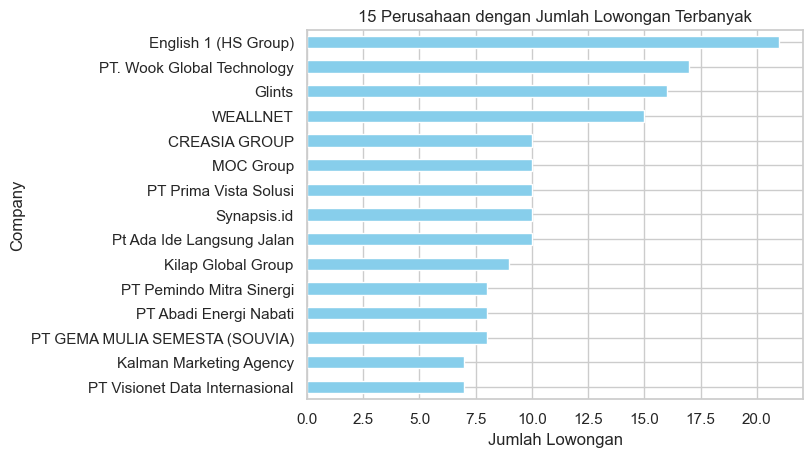

In [20]:
top_companies = df_merged['Company'].value_counts().nlargest(15)
top_companies.plot(kind='barh', color='skyblue')
plt.title("15 Perusahaan dengan Jumlah Lowongan Terbanyak")
plt.xlabel("Jumlah Lowongan")
plt.gca().invert_yaxis()
plt.show()


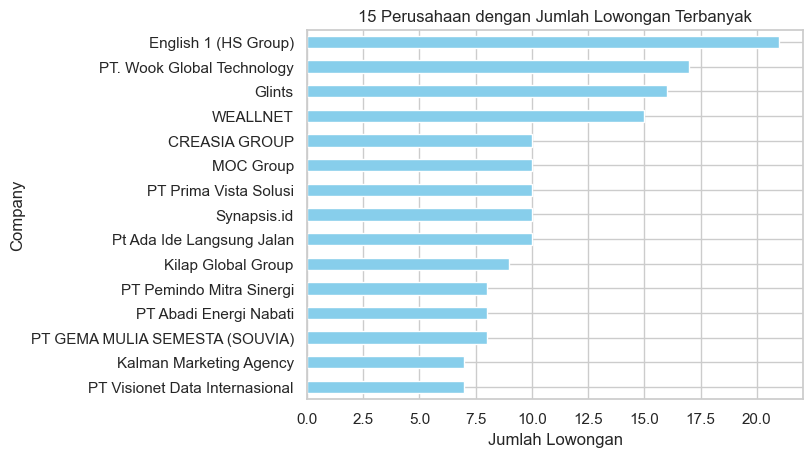

In [21]:
top_companies = df_merged['Company'].value_counts().nlargest(15)
top_companies.plot(kind='barh', color='skyblue')
plt.title("15 Perusahaan dengan Jumlah Lowongan Terbanyak")
plt.xlabel("Jumlah Lowongan")
plt.gca().invert_yaxis()
plt.show()


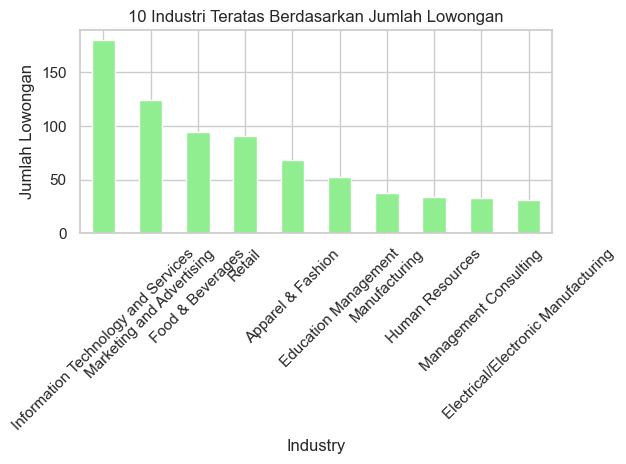

In [22]:
df_merged['Industry'].value_counts().nlargest(10).plot(kind='bar', color='lightgreen')
plt.title("10 Industri Teratas Berdasarkan Jumlah Lowongan")
plt.ylabel("Jumlah Lowongan")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


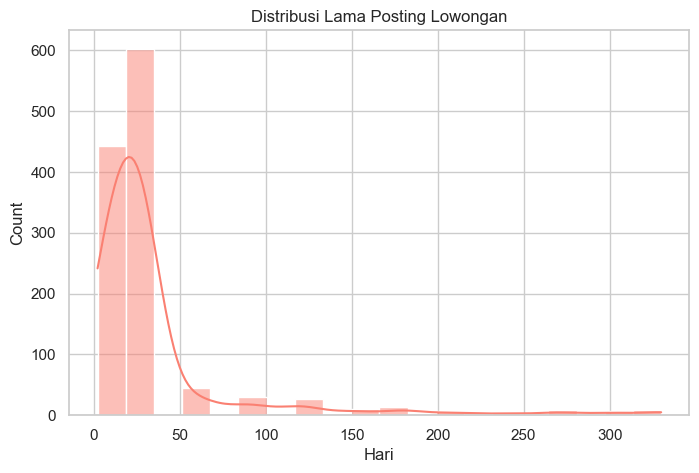

Rata-rata Durasi: 35.27980132450331
Median Durasi: 25.0


In [23]:
plt.figure(figsize=(8, 5))
sns.histplot(df_merged['Days_Posted'].dropna(), bins=20, kde=True, color='salmon')
plt.title("Distribusi Lama Posting Lowongan")
plt.xlabel("Hari")
plt.show()

print("Rata-rata Durasi:", df_merged['Days_Posted'].mean())
print("Median Durasi:", df_merged['Days_Posted'].median())


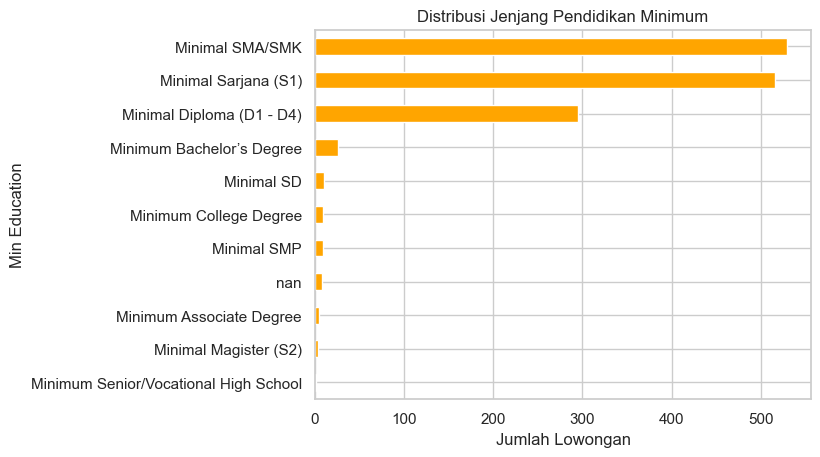

In [24]:
df_merged['Min Education'].value_counts().plot(kind='barh', color='orange')
plt.title("Distribusi Jenjang Pendidikan Minimum")
plt.xlabel("Jumlah Lowongan")
plt.gca().invert_yaxis()
plt.show()


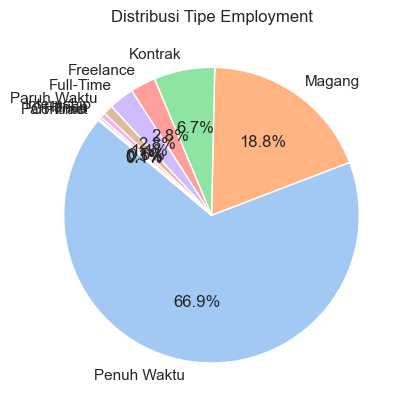

In [25]:
df_merged['Employment Type'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=sns.color_palette("pastel"))
plt.ylabel('')
plt.title("Distribusi Tipe Employment")
plt.show()


C:\Users\Aleisya Zahari Salam\AppData\Local\Temp\ipykernel_18684\3667085846.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=skills_df, y='Skill', x='Count', palette='coolwarm')


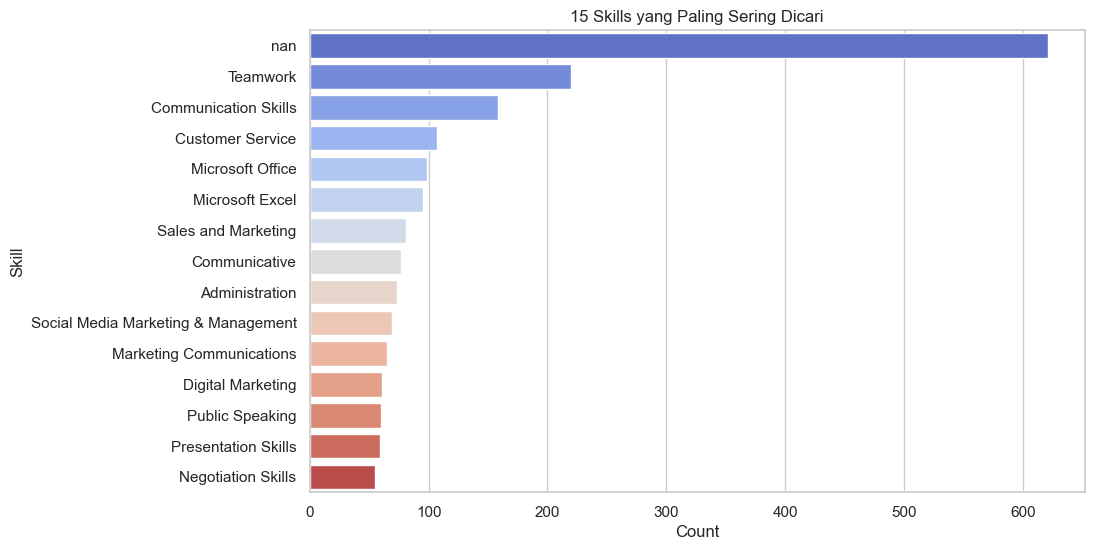

In [26]:
from collections import Counter

skills_list = df_merged['Skills'].dropna().str.split(', ')
all_skills = [skill for sublist in skills_list for skill in sublist]
common_skills = Counter(all_skills).most_common(15)

skills_df = pd.DataFrame(common_skills, columns=['Skill', 'Count'])

plt.figure(figsize=(10, 6))
sns.barplot(data=skills_df, y='Skill', x='Count', palette='coolwarm')
plt.title("15 Skills yang Paling Sering Dicari")
plt.show()


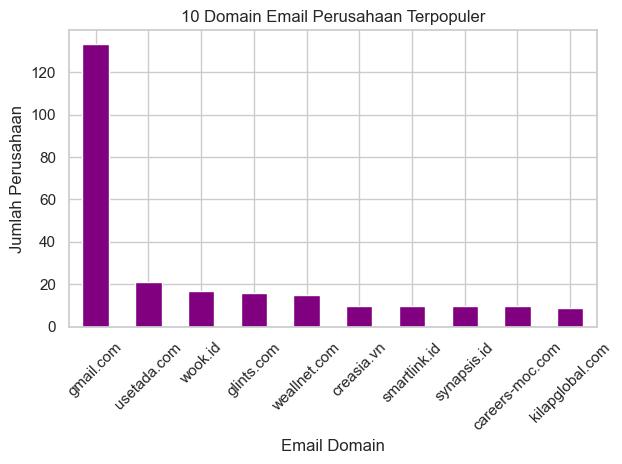

In [27]:
df_merged['Email Domain'].value_counts().head(10).plot(kind='bar', color='purple')
plt.title("10 Domain Email Perusahaan Terpopuler")
plt.ylabel("Jumlah Perusahaan")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


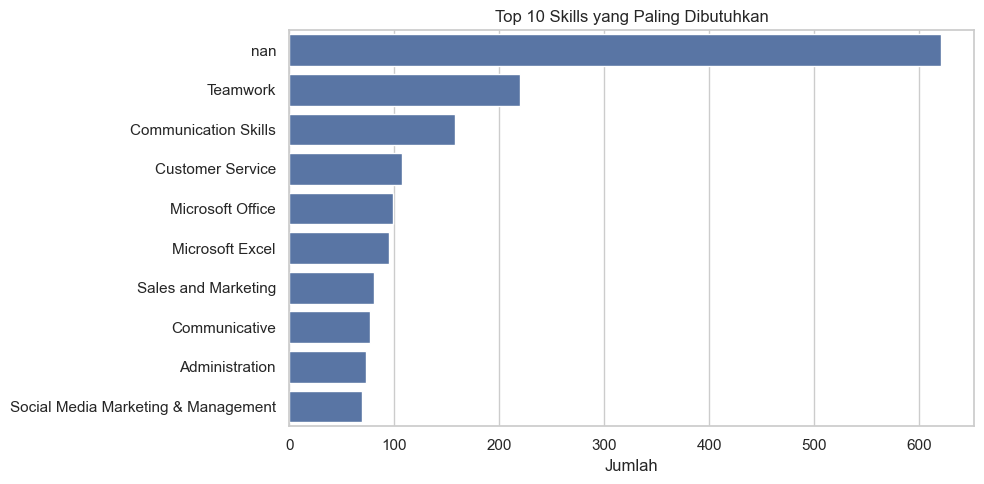

In [28]:
from collections import Counter

# Gabung semua skill jadi satu list
skills_list = df_merged['Skills'].dropna().str.split(',').sum()
top_skills = Counter([skill.strip() for skill in skills_list if skill.strip() != ""]).most_common(10)

# Visualisasi
skills, counts = zip(*top_skills)
plt.figure(figsize=(10,5))
sns.barplot(x=counts, y=skills)
plt.title('Top 10 Skills yang Paling Dibutuhkan')
plt.xlabel('Jumlah')
plt.tight_layout()
plt.show()


In [29]:
df_merged.head(-5)

Company                                    Job Title  \
0            Satria Martial Arts                                   Pramuniaga   
1     PT Sadhana Ekapraya Amitra            Internship Admin Service (Bekasi)   
2     PT Sadhana Ekapraya Amitra                    Sales Executive (Jakarta)   
3     PT Sadhana Ekapraya Amitra  Internship Asset Management (Jakarta Barat)   
4           PT Colorindo Chemtra                  Product Executive (Coating)   
...                          ...                                          ...   
1423  PT Realway Media Indonesia                               kol specialist   
1424  PT Realway Media Indonesia                                       Editor   
1425  PT Realway Media Indonesia                      Social Media Specialist   
1426  PT Realway Media Indonesia                   business development Hotel   
1427  PT Realway Media Indonesia                    magang keuangan/pembukuan   

                                               Job Link  \
0     https://glints.com/id/opportunities/jobs/pramu...   
1     https://glints.com/id/opportunities/jobs/inter...   
2     https://glints.com/id/opportunities/jobs/sales...   
3     https://glints.com/id/opportunities/jobs/inter...   
4     https://glints.com/id/opportunities/jobs/produ...   
...                                                 ...   
1423  https://glints.com/id/opportunities/jobs/kol-s...   
1424  https://glints.com/id/opportunities/jobs/edito...   
1425  https://glints.com/id/opportunities/jobs/socia...   
1426  https://glints.com/id/opportunities/jobs/busin...   
1427  https://glints.com/id/opportunities/jobs/magan...   

                                             Location_x  \
0     Kapanewon Banguntapan, Kab. Bantul, DI Yogyakarta   
1               Tambun Selatan, Kab. Bekasi, Jawa Barat   
2               Kebon Jeruk, Jakarta Barat, DKI Jakarta   
3               Kebon Jeruk, Jakarta Barat, DKI Jakarta   
4                 Kembangan, Jakarta Barat, DKI Jakarta   
...                                                 ...   
1423            Penjaringan, Jakarta Utara, DKI Jakarta   
1424          Kelapa Gading, Jakarta Utara, DKI Jakarta   
1425            Penjaringan, Jakarta Utara, DKI Jakarta   
1426            Penjaringan, Jakarta Utara, DKI Jakarta   
1427            Penjaringan, Jakarta Utara, DKI Jakarta   

                                 Job Category        Job Function  \
0                               Industri Jasa        Pelayan Toko   
1              Administrasi & HR & Accounting               Admin   
2                Business Development & Sales     Sales Executive   
3              Administrasi & HR & Accounting   Pengawas Keuangan   
4     Product Management & Project Management  Product Specialist   
...                                       ...                 ...   
1423                                Marketing      KOL Specialist   
1424                Seni, Media, & Komunikasi              Editor   
1425                                Marketing        Livestreamer   
1426             Business Development & Sales   Account Executive   
1427           Administrasi & HR & Accounting             Akuntan   

     Employment Type       Work Place              Min Education  \
0        Penuh Waktu  Kerja di kantor            Minimal SMA/SMK   
1        Penuh Waktu  Kerja di kantor  Minimal Diploma (D1 - D4)   
2        Penuh Waktu  Kerja di kantor  Minimal Diploma (D1 - D4)   
3        Penuh Waktu  Kerja di kantor            Minimal SMA/SMK   
4        Penuh Waktu           Hybrid       Minimal Sarjana (S1)   
...              ...              ...                        ...   
1423     Penuh Waktu  Kerja di kantor            Minimal SMA/SMK   
1424         Kontrak  Kerja di kantor            Minimal SMA/SMK   
1425     Penuh Waktu  Kerja di kantor            Minimal SMA/SMK   
1426     Penuh Waktu  Kerja di kantor  Minimal Diploma (D1 - D4)   
1427     Penuh Waktu  Kerja di kantor  Minimal Diploma (D

In [30]:
df_merged.columns

Index(['Company', 'Job Title', 'Job Link', 'Location_x', 'Job Category',
       'Job Function', 'Employment Type', 'Work Place', 'Min Education',
       'Min Experience', 'Salary Range', 'Job Posted', 'Last Updated',
       'Persyaratan', 'Skills', 'Deskripsi', 'Timestamp_Scraped', 'Name',
       'Website', 'Location_y', 'Industry', 'Full URL', 'Address', 'Instagram',
       'LinkedIn', 'YellowPages Link', 'Phone Number', 'Email',
       'Cleaned_Email', 'Scraped_URL', 'Scraped_Email', 'Scraped_Phone',
       'Days_Posted', 'Email Domain'],
      dtype='object')

In [31]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [32]:
df_merged.head(-5)

Company  \
0                                   Satria Martial Arts   
1                            PT Sadhana Ekapraya Amitra   
2                            PT Sadhana Ekapraya Amitra   
3                            PT Sadhana Ekapraya Amitra   
4                                  PT Colorindo Chemtra   
5                                  PT Colorindo Chemtra   
6                                  PT Colorindo Chemtra   
7                              PT Surya Sarana Dinamika   
8                              PT Surya Sarana Dinamika   
9                              PT Surya Sarana Dinamika   
10                             PT Surya Sarana Dinamika   
11                             PT Surya Sarana Dinamika   
12                            PT Inova Medika Solusindo   
13                            PT Inova Medika Solusindo   
14                            PT Inova Medika Solusindo   
15                            PT Inova Medika Solusindo   
16                            PT Inova Medika Solusindo   
17                                  PT Future Mediatrix   
18                    PT. Federal Mardhika Citramandiri   
19                    PT. Federal Mardhika Citramandiri   
20                    PT. Federal Mardhika Citramandiri   
21                    PT. Federal Mardhika Citramandiri   
22                                          Naval Cargo   
23                                          Naval Cargo   
24                              PT. David Roy Indonesia   
25                              PT. David Roy Indonesia   
26                              PT. David Roy Indonesia   
27                              PT. David Roy Indonesia   
28                          PT Garyman Kreasi Indonesia   
29                        PT Indowire Prima Industrindo   
30                        PT Indowire Prima Industrindo   
31                        PT Indowire Prima Industrindo   
32                        PT Indowire Prima Industrindo   
33                                       PT Global Cool   
34                                       PT Global Cool   
35                                       PT Global Cool   
36                                PT Murinda Iron Steel   
37                              PT Summarecon Agung Tbk   
38                              PT Summarecon Agung Tbk   
39                              PT Summarecon Agung Tbk   
40                              PT Summarecon Agung Tbk   
41                              PT Summarecon Agung Tbk   
42                              PT Summarecon Agung Tbk   
43                              PT Summarecon Agung Tbk   
44                                 PT Tunas Ridean, Tbk   
45                                 PT Tunas Ridean, Tbk   
46                                 PT Tunas Ridean, Tbk   
47                                 PT Tunas Ridean, Tbk   
48                                 PT Tunas Ridean, Tbk   
49                                        Sekawan Media   
50                                        Sekawan Media   
51                                        Sekawan Media   
52                                        Sekawan Media   
53                                        Sekawan Media   
54                          NBS (nusantara beta studio)   
55                          NBS (nusantara beta studio)   
56                          NBS (nusantara beta studio)   
57                          NBS (nusantara beta studio)   
58                          NBS (nusantara beta studio)   
59                          Pt Makmur Sejahtera Mesindo   
60                          Pt Makmur Sejahtera Mesindo   
61                          Pt Makmur Sejahtera Mesindo   
62                               PT Flux Asia Solusindo   
63    Indonesia International Institute For Life Sci...   
64    Indonesia International Institute For Life Sci...   
65                         PT. Global Infotech Solution   
66                         PT. Global Infotech Solution   
67                         PT. Globa

In [33]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1412 entries, 0 to 1432
Data columns (total 34 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Company            1412 non-null   object        
 1   Job Title          1412 non-null   object        
 2   Job Link           1412 non-null   object        
 3   Location_x         1412 non-null   object        
 4   Job Category       1412 non-null   object        
 5   Job Function       1412 non-null   object        
 6   Employment Type    1412 non-null   object        
 7   Work Place         1412 non-null   object        
 8   Min Education      1412 non-null   object        
 9   Min Experience     1412 non-null   object        
 10  Salary Range       1412 non-null   object        
 11  Job Posted         1412 non-null   object        
 12  Last Updated       1412 non-null   object        
 13  Persyaratan        1412 non-null   object        
 14  Skills       

# ini untuk tambahan kolom

In [34]:
df_merged = df_merged.rename(columns={
    'Location_x': 'Job_Location',
    'Location_y': 'Company_Location',
    'Company': 'Company_Name'  # untuk menghindari konflik keyword 'Company'
})


In [35]:
df_merged['Skill_Count'] = df_merged['Skills'].apply(lambda x: len(x.split(',')) if pd.notna(x) else 0)


In [36]:
# Provinsi: elemen terakhir
df_merged['Job_Province'] = df_merged['Job_Location'].apply(
    lambda x: x.split(',')[-1].strip() if pd.notna(x) else np.nan
)

# Kota/Kabupaten: elemen ke-2
df_merged['Job_City'] = df_merged['Job_Location'].apply(
    lambda x: x.split(',')[1].strip() if pd.notna(x) and len(x.split(',')) > 1 else np.nan
)


In [37]:
import re

def extract_salary_min(s):
    try:
        s_clean = s.replace('.', '').replace(',', '').upper()
        result = re.findall(r'IDR(\d+)', s_clean)
        return int(result[0]) if result else np.nan
    except:
        return np.nan

def extract_salary_max(s):
    try:
        s_clean = s.replace('.', '').replace(',', '').upper()
        result = re.findall(r'IDR\d+\s*-\s*(\d+)', s_clean)
        return int(result[0]) if result else np.nan
    except:
        return np.nan

df_merged['Salary_Min'] = df_merged['Salary Range'].apply(extract_salary_min)
df_merged['Salary_Max'] = df_merged['Salary Range'].apply(extract_salary_max)


In [32]:
# df_merged.to_csv("final_dataset_jobs.csv", index=False)


# data cleaning

In [39]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1412 entries, 0 to 1432
Data columns (total 39 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Company_Name       1412 non-null   object        
 1   Job Title          1412 non-null   object        
 2   Job Link           1412 non-null   object        
 3   Job_Location       1412 non-null   object        
 4   Job Category       1412 non-null   object        
 5   Job Function       1412 non-null   object        
 6   Employment Type    1412 non-null   object        
 7   Work Place         1412 non-null   object        
 8   Min Education      1412 non-null   object        
 9   Min Experience     1412 non-null   object        
 10  Salary Range       1412 non-null   object        
 11  Job Posted         1412 non-null   object        
 12  Last Updated       1412 non-null   object        
 13  Persyaratan        1412 non-null   object        
 14  Skills       

In [40]:
df_merged.head()

Company_Name                                    Job Title  \
0         Satria Martial Arts                                   Pramuniaga   
1  PT Sadhana Ekapraya Amitra            Internship Admin Service (Bekasi)   
2  PT Sadhana Ekapraya Amitra                    Sales Executive (Jakarta)   
3  PT Sadhana Ekapraya Amitra  Internship Asset Management (Jakarta Barat)   
4        PT Colorindo Chemtra                  Product Executive (Coating)   

                                            Job Link  \
0  https://glints.com/id/opportunities/jobs/pramu...   
1  https://glints.com/id/opportunities/jobs/inter...   
2  https://glints.com/id/opportunities/jobs/sales...   
3  https://glints.com/id/opportunities/jobs/inter...   
4  https://glints.com/id/opportunities/jobs/produ...   

                                        Job_Location  \
0  Kapanewon Banguntapan, Kab. Bantul, DI Yogyakarta   
1            Tambun Selatan, Kab. Bekasi, Jawa Barat   
2            Kebon Jeruk, Jakarta Barat, DKI Jakarta   
3            Kebon Jeruk, Jakarta Barat, DKI Jakarta   
4              Kembangan, Jakarta Barat, DKI Jakarta   

                              Job Category        Job Function  \
0                            Industri Jasa        Pelayan Toko   
1           Administrasi & HR & Accounting               Admin   
2             Business Development & Sales     Sales Executive   
3           Administrasi & HR & Accounting   Pengawas Keuangan   
4  Product Management & Project Management  Product Specialist   

  Employment Type       Work Place              Min Education  \
0     Penuh Waktu  Kerja di kantor            Minimal SMA/SMK   
1     Penuh Waktu  Kerja di kantor  Minimal Diploma (D1 - D4)   
2     Penuh Waktu  Kerja di kantor  Minimal Diploma (D1 - D4)   
3     Penuh Waktu  Kerja di kantor            Minimal SMA/SMK   
4     Penuh Waktu           Hybrid       Minimal Sarjana (S1)   

                   Min Experience                    Salary Range  \
0                             nan  IDR1.500.000 - 2.300.000/Bulan   
1  Pengalaman kurang dari 1 tahun  IDR1.950.000 - 2.600.000/Bulan   
2          1 - 3 tahun pengalaman  IDR4.000.000 - 6.000.000/Bulan   
3  Pengalaman kurang dari 1 tahun  IDR1.650.000 - 2.200.000/Bulan   
4  Pengalaman kurang dari 1 tahun  IDR6.000.000 - 8.000.000/Bulan   

                 Job Posted                  Last Updated  \
0  Tayang 27 hari yang lalu  Diperbarui 27 hari yang lalu   
1  Tayang 11 hari yang lalu  Diperbarui 11 hari yang lalu   
2   Tayang 6 hari yang lalu   Diperbarui 6 hari yang lalu   
3   Tayang 5 hari yang lalu   Diperbarui 5 hari yang lalu   
4  Tayang 8 bulan yang lalu  Diperbarui 27 hari yang lalu   

                                         Persyaratan  \
0      Kerja di kantor, Minimal SMA/SMK, 18-30 tahun   
1  Kerja di kantor, Pengalaman kurang dari 1 tahu...   
2  Kerja di kantor, 1 - 3 tahun pengalaman, Minim...   
3  Kerja di kantor, Pengalaman kurang dari 1 tahu...   
4  Hybrid, Pengalaman kurang dari 1 tahun, Minima...   

                                              Skills  \
0                                                nan   
1                                                nan   
2                                                nan   
3  Paham Mengenai Excel, Dapat Pengarsipan, Commu...   
4                                                nan   

                                           Deskripsi   Timestamp_Scraped  \
0  Pria/Wanita\nUsia maksimal 30 tahun, ramah, ju... 2025-06-24 08:28:19   
1  Kualifikasi Internship – Admin Service\nPendid... 2025-06-24 08:28:29   
2  Tanggungjawab kerja:\nMenjaga Hubungan baik de... 2025-06-24 08:28:39   
3  Kualifikasi Anak Magang Asset Management\nMaha... 2025-06-24 08:29:08   
4  • Bersama dengan sales untuk promosi produk di... 2025-06-24 08:29:38   

                         Name                              Website  \
0         Satria Martial Arts  https://www.satria-martialarts.com/   
1  PT Sadhana Ekapraya Amitra    

## edit education

In [41]:
df_merged['Min Education'].value_counts(dropna=False).reset_index().rename(columns={'index':'Min Education','Min Education':'Count'})


Count  count
0                         Minimal SMA/SMK    530
1                    Minimal Sarjana (S1)    516
2               Minimal Diploma (D1 - D4)    295
3               Minimum Bachelor’s Degree     26
4                              Minimal SD     10
5                  Minimum College Degree      9
6                             Minimal SMP      9
7                                     nan      8
8                Minimum Associate Degree      5
9                   Minimal Magister (S2)      3
10  Minimum Senior/Vocational High School      1

In [44]:
edu_mapping = {
    "Minimal SMA/SMK": "SMA/SMK",
    "Minimal Sarjana (S1)": "S1",
    "Minimal Diploma (D1 - D4)": "D1-D4",
    "Minimum Bachelor’s Degree": "S1",
    "Minimal SD": "SD",
    "Minimal SMP": "SMP",
    "Minimum College Degree": "D1-D4",
    "Minimal Magister (S2)": "S2",
    "Minimum Associate Degree": "D1-D4",
    "Minimum Senior/Vocational High School": "SMA/SMK"
}


In [45]:
df_merged['Min Education'] = df_merged['Min Education'].replace(edu_mapping)
df_merged['Min Education'] = df_merged['Min Education'].fillna('Unknown')


In [42]:
df_merged.isna().sum().reset_index().rename(columns={'index': 'Column', 0: 'Missing Values'})


Column  Missing Values
0        Company_Name               0
1           Job Title               0
2            Job Link               0
3        Job_Location               0
4        Job Category               0
5        Job Function               0
6     Employment Type               0
7          Work Place               0
8       Min Education               0
9      Min Experience               0
10       Salary Range               0
11         Job Posted               0
12       Last Updated               0
13        Persyaratan               0
14             Skills               0
15          Deskripsi               0
16  Timestamp_Scraped               0
17               Name               0
18            Website               0
19   Company_Location               0
20           Industry               0
21           Full URL               0
22            Address               0
23          Instagram               0
24           LinkedIn               0
25   YellowPages Link               0
26       Phone Number               0
27              Email               0
28      Cleaned_Email               0
29        Scraped_URL               0
30      Scraped_Email               0
31      Scraped_Phone               0
32        Days_Posted             204
33       Email Domain             497
34        Skill_Count               0
35       Job_Province               0
36           Job_City               8
37         Salary_Min             259
38         Salary_Max             359

In [43]:
df_merged[['Salary Range', 'Salary_Min', 'Salary_Max']].sample(10)


Salary Range  Salary_Min  Salary_Max
214     IDR5.000.000 - 7.000.000/Bulan   5000000.0   7000000.0
1342    IDR1.000.000 - 2.500.000/Bulan   1000000.0   2500000.0
687     IDR1.000.000 - 1.000.001/Bulan   1000000.0   1000001.0
99                                 nan         NaN         NaN
1378                IDR1.000.000/Bulan   1000000.0         NaN
922     IDR3.500.000 - 4.500.000/Bulan   3500000.0   4500000.0
1273                               nan         NaN         NaN
1369  IDR15.000.000 - 23.000.000/Bulan  15000000.0  23000000.0
1116    IDR2.000.000 - 3.000.000/Bulan   2000000.0   3000000.0
634                 IDR1.000.000/Bulan   1000000.0         NaN

In [46]:
df_merged.to_excel("new_full_dataset_jobs.xlsx", index=False)


In [30]:
# # Pastikan kolom Cleaned_Email dibaca sebagai string
# df_merged['Cleaned_Email'] = df_merged['Cleaned_Email'].astype(str)

# # Bersihkan spasi dan string 'nan' yang sebenarnya bukan NaN
# df_merged['Cleaned_Email_clean'] = df_merged['Cleaned_Email'].str.strip().replace({'': np.nan, 'nan': np.nan})

# # Filter baris yang benar-benar punya email valid
# filtered_df = df_merged[df_merged['Cleaned_Email_clean'].notna()]

# # Simpan ke file Excel
# filtered_df.to_excel("01.filter_final_dataset_jobs.xlsx", index=False)


In [47]:
import numpy as np
import pandas as pd

# Pastikan kolom Cleaned_Email dan Phone Number bertipe string
df_merged['Cleaned_Email'] = df_merged['Cleaned_Email'].astype(str)
df_merged['Phone Number'] = df_merged['Phone Number'].astype(str)

# Bersihkan spasi dan ganti 'nan' menjadi NaN
df_merged['Cleaned_Email_clean'] = df_merged['Cleaned_Email'].str.strip().replace(
    {'': np.nan, 'nan': np.nan}
)
df_merged['Phone_Number_clean'] = df_merged['Phone Number'].str.strip().replace(
    {'': np.nan, 'nan': np.nan}
)

# Filter: setidaknya salah satu (email atau phone) harus ada
filtered_df = df_merged[
    df_merged['Cleaned_Email_clean'].notna() | df_merged['Phone_Number_clean'].notna()
]

# Simpan ke file Excel
filtered_df.to_excel("00.new_filter_final_dataset_jobs.xlsx", index=False)

print(f"✅ Total data sebelum filter: {len(df_merged)}, setelah filter: {len(filtered_df)}")


✅ Total data sebelum filter: 1412, setelah filter: 996


In [48]:
filtered_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 996 entries, 0 to 1432
Data columns (total 41 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Company_Name         996 non-null    object        
 1   Job Title            996 non-null    object        
 2   Job Link             996 non-null    object        
 3   Job_Location         996 non-null    object        
 4   Job Category         996 non-null    object        
 5   Job Function         996 non-null    object        
 6   Employment Type      996 non-null    object        
 7   Work Place           996 non-null    object        
 8   Min Education        996 non-null    object        
 9   Min Experience       996 non-null    object        
 10  Salary Range         996 non-null    object        
 11  Job Posted           996 non-null    object        
 12  Last Updated         996 non-null    object        
 13  Persyaratan          996 non-null    ob

In [33]:
# # Pastikan kolom Cleaned_Email dibaca sebagai string
# df_company['Cleaned_Email'] = df_company['Cleaned_Email'].astype(str)

# # Bersihkan spasi dan string 'nan' literal
# df_company['Cleaned_Email_clean'] = df_company['Cleaned_Email'].str.strip().replace({'': np.nan, 'nan': np.nan})

# # Filter hanya baris dengan email yang valid
# filtered_df = df_company[df_company['Cleaned_Email_clean'].notna()]

# # Simpan hasil ke file Excel baru
# filtered_df.to_excel("01.df_company.xlsx", index=False)

## visualisasi score card

In [51]:
import numpy as np
import pandas as pd

# Total perusahaan unik
num_unique_companies = filtered_df['Full URL'].nunique()

# Total job unik
num_unique_jobs = filtered_df['Job Link'].nunique()

# Jumlah data per provinsi
jobs_per_province = filtered_df['Job_Province'].value_counts(dropna=False)

# Rata-rata hari tayang
avg_days_posted = filtered_df['Days_Posted'].mean()

# Rata-rata skill per job
avg_skills = filtered_df['Skill_Count'].mean()

# Jumlah baris yang punya email valid
num_with_email = filtered_df['Cleaned_Email_clean'].notna().sum()

# Jumlah baris yang punya phone valid
num_with_phone = filtered_df['Phone_Number_clean'].notna().sum()

# Buat summary dalam bentuk dictionary
summary = {
    "Total Data Filtered": len(filtered_df),
    "Unique Companies (Full URL)": num_unique_companies,
    "Unique Job Links": num_unique_jobs,
    "Average Days Posted": round(avg_days_posted, 2),
    "Average Skills per Job": round(avg_skills, 2),
    "Has Valid Email": num_with_email,
    "Has Valid Phone Number": num_with_phone,
}

# Konversi ke DataFrame untuk tampilan tabel
scorecard_df = pd.DataFrame(list(summary.items()), columns=["Metric", "Value"])

# Tampilkan scorecard
print(scorecard_df)

# Jika mau lihat jobs per provinsi lebih detail:
print("\nJobs per province:")
print(jobs_per_province)


                        Metric   Value
0          Total Data Filtered  996.00
1  Unique Companies (Full URL)  301.00
2             Unique Job Links  996.00
3          Average Days Posted   36.53
4       Average Skills per Job    3.74
5              Has Valid Email  921.00
6       Has Valid Phone Number  405.00

Jobs per province:
Job_Province
DKI Jakarta                  412
Jawa Barat                   138
Banten                       106
Jawa Timur                   104
DI Yogyakarta                 74
Bali                          43
Thành phố Hồ Chí Minh         39
Jawa Tengah                   31
Sumatera Selatan               7
Sumatera Utara                 6
Lampung                        6
Kepulauan Bangka Belitung      5
Kalimantan Selatan             5
nan                            5
Riau                           5
Kalimantan Timur               4
Kepulauan Riau                 4
Kalimantan Barat               1
Sulawesi Tengah                1
Name: count, dtype: int64


# explode skill untuk visualisasi

In [49]:
df_skills = filtered_df.assign(Skills=filtered_df['Skills'].str.split(',')).explode('Skills')

# Bersihkan spasi
df_skills['Skills'] = df_skills['Skills'].str.strip()

df_skills.head()

Company_Name                                    Job Title  \
0         Satria Martial Arts                                   Pramuniaga   
1  PT Sadhana Ekapraya Amitra            Internship Admin Service (Bekasi)   
2  PT Sadhana Ekapraya Amitra                    Sales Executive (Jakarta)   
3  PT Sadhana Ekapraya Amitra  Internship Asset Management (Jakarta Barat)   
3  PT Sadhana Ekapraya Amitra  Internship Asset Management (Jakarta Barat)   

                                            Job Link  \
0  https://glints.com/id/opportunities/jobs/pramu...   
1  https://glints.com/id/opportunities/jobs/inter...   
2  https://glints.com/id/opportunities/jobs/sales...   
3  https://glints.com/id/opportunities/jobs/inter...   
3  https://glints.com/id/opportunities/jobs/inter...   

                                        Job_Location  \
0  Kapanewon Banguntapan, Kab. Bantul, DI Yogyakarta   
1            Tambun Selatan, Kab. Bekasi, Jawa Barat   
2            Kebon Jeruk, Jakarta Barat, DKI Jakarta   
3            Kebon Jeruk, Jakarta Barat, DKI Jakarta   
3            Kebon Jeruk, Jakarta Barat, DKI Jakarta   

                     Job Category       Job Function Employment Type  \
0                   Industri Jasa       Pelayan Toko     Penuh Waktu   
1  Administrasi & HR & Accounting              Admin     Penuh Waktu   
2    Business Development & Sales    Sales Executive     Penuh Waktu   
3  Administrasi & HR & Accounting  Pengawas Keuangan     Penuh Waktu   
3  Administrasi & HR & Accounting  Pengawas Keuangan     Penuh Waktu   

        Work Place Min Education                  Min Experience  \
0  Kerja di kantor       SMA/SMK                             nan   
1  Kerja di kantor         D1-D4  Pengalaman kurang dari 1 tahun   
2  Kerja di kantor         D1-D4          1 - 3 tahun pengalaman   
3  Kerja di kantor       SMA/SMK  Pengalaman kurang dari 1 tahun   
3  Kerja di kantor       SMA/SMK  Pengalaman kurang dari 1 tahun   

                     Salary Range                Job Posted  \
0  IDR1.500.000 - 2.300.000/Bulan  Tayang 27 hari yang lalu   
1  IDR1.950.000 - 2.600.000/Bulan  Tayang 11 hari yang lalu   
2  IDR4.000.000 - 6.000.000/Bulan   Tayang 6 hari yang lalu   
3  IDR1.650.000 - 2.200.000/Bulan   Tayang 5 hari yang lalu   
3  IDR1.650.000 - 2.200.000/Bulan   Tayang 5 hari yang lalu   

                   Last Updated  \
0  Diperbarui 27 hari yang lalu   
1  Diperbarui 11 hari yang lalu   
2   Diperbarui 6 hari yang lalu   
3   Diperbarui 5 hari yang lalu   
3   Diperbarui 5 hari yang lalu   

                                         Persyaratan                Skills  \
0      Kerja di kantor, Minimal SMA/SMK, 18-30 tahun                   nan   
1  Kerja di kantor, Pengalaman kurang dari 1 tahu...                   nan   
2  Kerja di kantor, 1 - 3 tahun pengalaman, Minim...                   nan   
3  Kerja di kantor, Pengalaman kurang dari 1 tahu...  Paham Mengenai Excel   
3  Kerja di kantor, Pengalaman kurang dari 1 tahu...     Dapat Pengarsipan   

                                           Deskripsi   Timestamp_Scraped  \
0  Pria/Wanita\nUsia maksimal 30 tahun, ramah, ju... 2025-06-24 08:28:19   
1  Kualifikasi Internship – Admin Service\nPendid... 2025-06-24 08:28:29   
2  Tanggungjawab kerja:\nMenjaga Hubungan baik de... 2025-06-24 08:28:39   
3  Kualifikasi Anak Magang Asset Management\nMaha... 2025-06-24 08:29:08   
3  Kualifikasi Anak Magang Asset Management\nMaha... 2025-06-24 08:29:08   

                         Name                              Website  \
0         Satria Martial Arts  https://www.satria-martialarts.com/   
1  PT Sadhana Ekapraya Amitra              https://sadhanas.co.id/   
2  PT Sadhana Ekapraya Amitra              https://sadhanas.co.id/   
3  PT Sadhana Ekapraya Amitra              https://sadhanas.co.id/   
3  PT Sadhana Ekapraya Amitra              https://sadhanas.co.id/   

                        Company_Location              Industry  \
0  Kab. Bantul, DI Yogyakarta

In [50]:
df_skills.to_excel("00.skilss_explode_df.xlsx", index=False)